In [2]:
# CS256 Assignment7
# Create a graphic displaying the Apache accesses on hills on the first day of instruction in the present semester. Due 10/28.

In [305]:
import csv
import matplotlib.pyplot as plt
import numpy as np

# Extracting neighborhood data
nHood = dict()
with open('sfzip_neighborhood.txt', 'rt') as nd:
    for line in nd:
        if not line.startswith('#'):
            nHood[line.split()[1]] = line.split(' - ')[-1].strip()
        else:
            continue
del nHood['Noe']

# Extracting zip, income and population data
incomeDict = dict()
popuDict = dict()
with open('SF_zipatlasData.csv', newline = '') as csvfile:
    fd = csv.DictReader(csvfile)
    for row in fd:
        if row:
            incomeDict[row['Zip Code']] = row['Avg. Income/H/hold'][1:].strip() 
            popuDict[row['Zip Code']] = row['Population'].strip()

del incomeDict['94128'] 
del popuDict['94128']

# arranging the dicts to match x-axis data
def arangeDict(dOld):
    dNew = dict()
    for key, item in dOld.items():
        if key in nHood.keys():
            newkey = key + " : " + nHood[key]
            dNew[newkey]  = float(dOld[key].replace(',', ''))
    return dNew        
incomeD = arangeDict(incomeDict)
popuD = arangeDict(popuDict)
print(incomeD) 
print((popuD))


incomeRange = [i for i in range(0, 110000, 10000)]
print((incomeRange))
popList = []
zipList = []
for i in range(1, len(incomeRange)):
    # print(incomeRange[i])
    list1 = [y for x, y in popuD.items() if incomeD[x] > incomeRange[i-1] and incomeD[x] <= incomeRange[i]]
    popList.append(list1) 
    list2 = [x for x, y in popuD.items() if incomeD[x] > incomeRange[i-1] and incomeD[x] <= incomeRange[i]]
    zipList.append(list2)
print(popList)
print(zipList)
newDict = sorted(incomeD.items(), key = lambda d : d[1], reverse = True) # in items tuple d[0] = key, d[1] = value
    

{'94127 : St Francis Wood': 95313.0, '94105 : Embarcadero South': 88976.0, '94123 : Marina District': 84710.0, '94131 : Twin Peaks': 76044.0, '94114 : Castro': 75727.0, '94129 : Presidio': 73571.0, '94116 : Outter Sunset': 66627.0, '94117 : Cole Valley': 63983.0, '94121 : Outter Richmond': 61776.0, '94118 : Richmond District': 61609.0, '94107 : Portrero Hill': 61362.0, '94122 : Sunset District': 60733.0, '94112 : Ingleside': 57629.0, '94111 : Embarcadero North': 56569.0, '94132 : Lake Merced': 55000.0, '94115 : Western Addition': 54879.0, '94110 : Mission District': 53795.0, '94109 : Russian Hill': 43444.0, '94133 : Fishermans Wharf': 40990.0, '94124 : Bayview': 37146.0, '94108 : Chinatown': 31542.0, '94103 : SoMa': 31131.0, '94102 : Hayes Valley': 22351.0, '94104 : Financial District': 14609.0}
{'94127 : St Francis Wood': 20624.0, '94105 : Embarcadero South': 2058.0, '94123 : Marina District': 22903.0, '94131 : Twin Peaks': 27897.0, '94114 : Castro': 30574.0, '94129 : Presidio': 2228.

In [306]:
x = [str(item) for item in incomeRange]
y = [sum(item) for item in popList]
print(y)
print(len(incomeRange))
print(len(y))
y1 = [(-10000 * len(item)) for item in zipList]
print(y1)
ymajor = np.arange(0, 300000, 50000)
y1major = np.arange(0, -80000, -10000)
x1label = [x[i-1] + '-' + x[i] for i in range (1, len(x))]
y1label = [0, 1, 2, 3, 4, 5, 6, 7]
print(x1label)
mean = sum(incomeD.values()) / len(incomeD)
print(mean)

[0, 374.0, 28991.0, 69902.0, 83149.0, 210478.0, 235968.0, 60699.0, 24961.0, 20624.0]
11
10
[0, -10000, -10000, -30000, -20000, -50000, -60000, -30000, -20000, -10000]
['0-10000', '10000-20000', '20000-30000', '30000-40000', '40000-50000', '50000-60000', '60000-70000', '70000-80000', '80000-90000', '90000-100000']
57063.166666666664


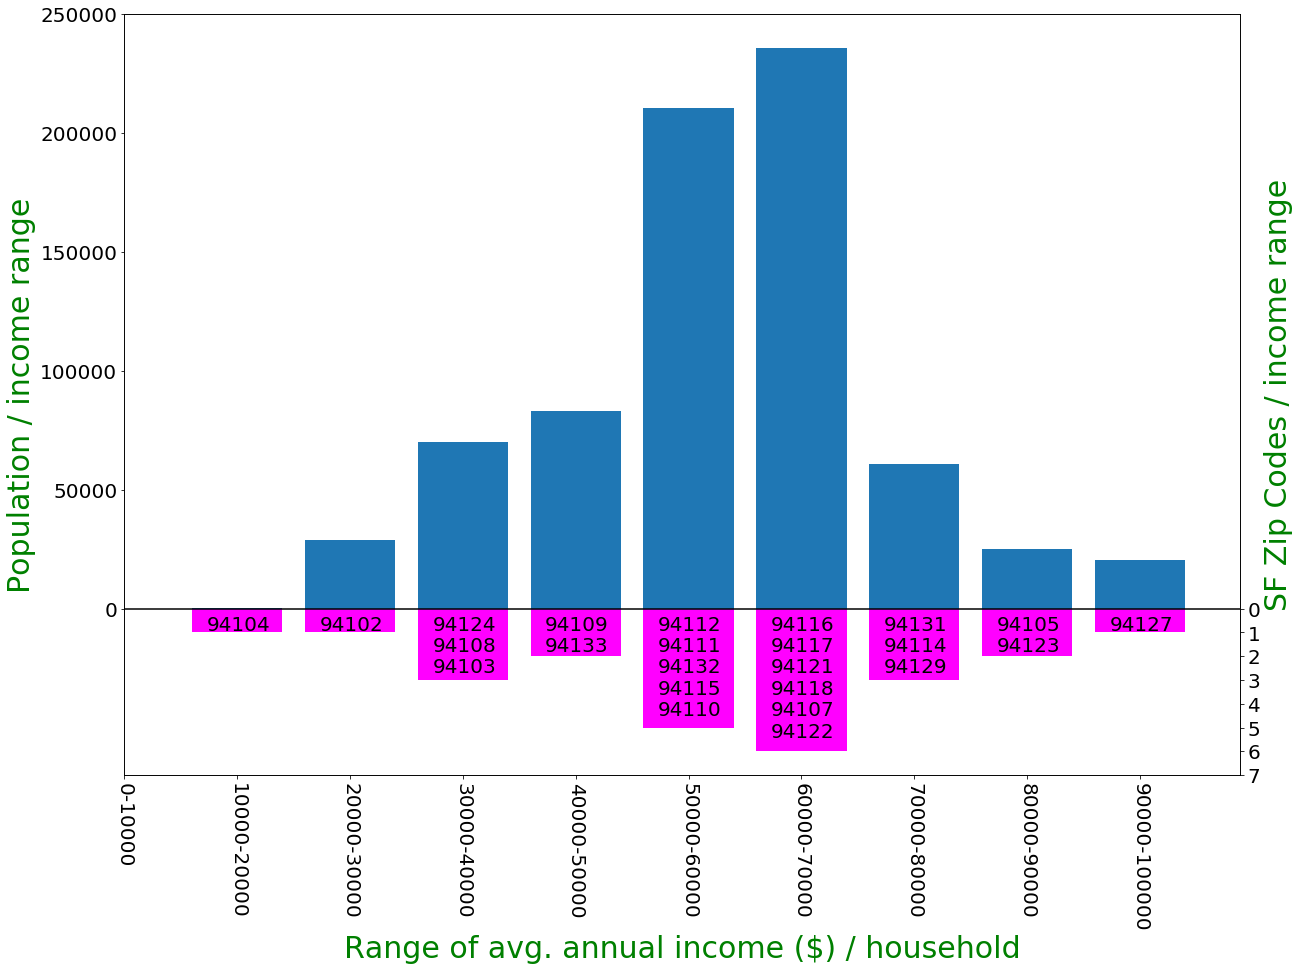

In [308]:
plt.rcParams["figure.figsize"] = (20, 14)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.bar(x[1:], y)
ax2 = ax.twinx()
ax2.bar(x[1:], y1, color = 'magenta')
ax.set_ylim(ymin = -70000, ymax = 250000)
ax2.set_ylim(ymin = -70000, ymax = 250000)
ax.set_xlim(xmin = 0)
ax.set_xlabel('Range of avg. annual income ($) / household', color = 'green', fontsize = 30)
ax.set_ylabel('Population / income range', color = 'green', fontsize = 30)
ax2.set_ylabel('SF Zip Codes / income range', color = 'green', fontsize = 30)
ax.set_xticklabels(x1label, fontsize = 20, rotation = -90)
ax.set_yticks(ymajor)
ax.set_yticklabels(ymajor, fontsize = 20)
ax2.set_yticks(y1major)
ax2.set_yticklabels(y1label, fontsize = 20)
plt.axhline(0, color='black')
for i in range(1, len(zipList)-1):
    item = zipList[i] 
    for j in range(len(item)):
            plt.text(i - 0.27, -9000 * (j+1), item[j][0:5], fontsize = 20)

plt.text(9 - 0.27, -9000, zipList[-1][0][0:5], fontsize = 20)

plt.show()